In [6]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import random

from wordcloud import WordCloud, STOPWORDS


In [7]:
#creating the table
df = pd.read_csv(r'C:\Users\flowe\Downloads\Data Model - Pizza Sales.csv')
df 

,order_details_id,table_number,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,12/31/2015,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617,21348,four_cheese_l,1,12/31/2015,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618,21348,napolitana_s,1,12/31/2015,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619,21349,mexicana_l,1,12/31/2015,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


# BB's Buongustaio Pizza Restaurante 2015 Annual Review

In this project we'll be analysing store data from stakeholders and creating a dashboard of the 2015 annual sales review. Taking a general look at the data, some of the information collected from the store is the customer order time, the date of order, the pizza name, type and size, as well as the total pice of each order recieved.




In [8]:
df.head()

,order_details_id,table_number,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [9]:
df.columns

Index(['order_details_id', 'table_number', 'pizza_id', 'quantity',
       'order_date', 'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

In [10]:
df.dtypes

order_details_id       int64
table_number           int64
pizza_id              object
quantity               int64
order_date            object
order_time            object
unit_price           float64
total_price          float64
pizza_size            object
pizza_category        object
pizza_ingredients     object
pizza_name            object
dtype: object

### Defining columns:
##### - table_number: Unique identifier for each order placed by a table
##### - order_details_id: Unique identifier for each pizza placed within each order (pizzas of the same type and size are kept in the same row, and the quantity increases)
##### - pizza_id: Unique key identifier that ties the pizza ordered to its details, like size and price
##### - quantity: Quantity ordered for each pizza of the same type and size
##### - order_date: Date the order was placed (entered into the system prior to cooking & serving)
##### - order_time: Time the order was placed (entered into the system prior to cooking & serving)
##### - unit_price: Price of the pizza in USD
##### - total_price: unit_price * quantity
##### - pizza_size: Size of the pizza (Small, Medium, Large, X Large, or XX Large)
##### - pizza_type: Unique key identifier that ties the pizza ordered to its details, like size and price
##### - pizza_ingredients: ingredients used in the pizza as shown in the menu (they all include Mozzarella Cheese, even if not specified; and they all include Tomato Sauce, unless another sauce is specified)
##### - pizza_name: Name of the pizza as shown in the menu

As we move forward to answer certain questions, we will have to construct several features suitable for that particular query. For now, we will construct two features: day_of_week: The day of the week the order was placed, hour_of_the_week: The time of day the order was placed by the whole hour, and month: The mont the order was placed. These features will help us determine our best selling days of the week, months and times of day.

In [11]:
# creating day of the week column
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
df["day_of_week"] = df["order_date"].dt.dayofweek
df
# max_date = df["order_date"].max()

# print(df[["day_of_week", "order_date"]])

,order_details_id,table_number,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,day_of_week
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,3
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,3
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,3
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,3
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,2015-12-31,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza,3
48616,48617,21348,four_cheese_l,1,2015-12-31,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza,3
48617,48618,21348,napolitana_s,1,2015-12-31,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza,3
48618,48619,21349,mexicana_l,1,2015-12-31,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,3


In [12]:
#creating hour column
df['order_time'] = pd.to_datetime(df['order_time'], errors='coerce')
df["hour_of_day"] = df["order_time"].dt.hour
df


,order_details_id,table_number,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,day_of_week,hour_of_day
0,1,1,hawaiian_m,1,2015-01-01,2023-03-22 11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,3,11
1,2,2,classic_dlx_m,1,2015-01-01,2023-03-22 11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,3,11
2,3,2,five_cheese_l,1,2015-01-01,2023-03-22 11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,3,11
3,4,2,ital_supr_l,1,2015-01-01,2023-03-22 11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,3,11
4,5,2,mexicana_m,1,2015-01-01,2023-03-22 11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,3,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,2015-12-31,2023-03-22 21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza,3,21
48616,48617,21348,four_cheese_l,1,2015-12-31,2023-03-22 21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza,3,21
48617,48618,21348,napolitana_s,1,2015-12-31,2023-03-22 21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza,3,21
48618,48619,21349,mexicana_l,1,2015-12-31,2023-03-22 22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,3,22


In [13]:
#creating month column
df['order_time'] = pd.to_datetime(df['order_time'], errors='coerce')
df["month_of_sale"] = df["order_date"].dt.month
df

,order_details_id,table_number,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,day_of_week,hour_of_day,month_of_sale
0,1,1,hawaiian_m,1,2015-01-01,2023-03-22 11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,3,11,1
1,2,2,classic_dlx_m,1,2015-01-01,2023-03-22 11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,3,11,1
2,3,2,five_cheese_l,1,2015-01-01,2023-03-22 11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,3,11,1
3,4,2,ital_supr_l,1,2015-01-01,2023-03-22 11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,3,11,1
4,5,2,mexicana_m,1,2015-01-01,2023-03-22 11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,3,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,2015-12-31,2023-03-22 21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza,3,21,12
48616,48617,21348,four_cheese_l,1,2015-12-31,2023-03-22 21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza,3,21,12
48617,48618,21348,napolitana_s,1,2015-12-31,2023-03-22 21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza,3,21,12
48618,48619,21349,mexicana_l,1,2015-12-31,2023-03-22 22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,3,22,12


Perfect, now we can begin to take a closer look at this data.

In [14]:
df.shape

(48620, 15)

In [15]:
df.info

<bound method DataFrame.info of        order_details_id  table_number       pizza_id  quantity order_date  \
0                     1             1     hawaiian_m         1 2015-01-01   
1                     2             2  classic_dlx_m         1 2015-01-01   
2                     3             2  five_cheese_l         1 2015-01-01   
3                     4             2    ital_supr_l         1 2015-01-01   
4                     5             2     mexicana_m         1 2015-01-01   
...                 ...           ...            ...       ...        ...   
48615             48616         21348  ckn_alfredo_m         1 2015-12-31   
48616             48617         21348  four_cheese_l         1 2015-12-31   
48617             48618         21348   napolitana_s         1 2015-12-31   
48618             48619         21349     mexicana_l         1 2015-12-31   
48619             48620         21350      bbq_ckn_s         1 2015-12-31   

               order_time  unit_price  tota

In [19]:
df.describe()

,order_details_id,table_number,quantity,unit_price,total_price,day_of_week,hour_of_day,month_of_sale
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474,3.023797,15.911806,6.451131
std,14035.529381,6180.119770,0.143077,3.621789,4.437398,1.934155,3.149836,3.435420
min,1.000000,1.000000,1.000000,9.750000,9.750000,0.000000,9.000000,1.000000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000,1.000000,13.000000,3.000000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000,3.000000,16.000000,6.000000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000,5.000000,18.000000,9.000000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000,6.000000,23.000000,12.000000


In [16]:
#How many pizzas have we sold in total?
df["quantity"].sum()

49574

##### Ignoring order details and table number, it looks like the total sales for 2015 were $817,860.05. 48,620 orders were placed for the year and in total, the company sold 49,574 pizzas. The average cost of any pizza at BB's will run a customer $16.49. The most a customer will pay is $35.95 for a XXL Greek Pizza, and the least is $9.75 for a small pepperoni. The most a customer has spent at BB's is $83.00. On average, a customer order will make a sale of $16.82.

##### The top selling pizzas at BB's for the year were:

In [17]:
#It looks like these 10 pizzas brought in the most sales.
df.groupby('pizza_name')['total_price'].sum().round(2).sort_values(ascending=False).head(10)

pizza_name
The Thai Chicken Pizza          43434.25
The Barbecue Chicken Pizza      42768.00
The California Chicken Pizza    41409.50
The Classic Deluxe Pizza        38180.50
The Spicy Italian Pizza         34831.25
The Southwest Chicken Pizza     34705.75
The Italian Supreme Pizza       33476.75
The Hawaiian Pizza              32273.25
The Four Cheese Pizza           32265.70
The Sicilian Pizza              30940.50
Name: total_price, dtype: float64

And which pizzas didn't sell so well?


In [18]:
df.groupby('pizza_name')['total_price'].sum().round(2).sort_values(ascending=True).head(10)

pizza_name
The Brie Carre Pizza            11588.50
The Green Garden Pizza          13955.75
The Spinach Supreme Pizza       15277.75
The Mediterranean Pizza         15360.50
The Spinach Pesto Pizza         15596.00
The Calabrese Pizza             15934.25
The Italian Vegetables Pizza    16019.25
The Soppressata Pizza           16425.75
The Chicken Pesto Pizza         16701.75
The Chicken Alfredo Pizza       16900.25
Name: total_price, dtype: float64

How many different flavors of pizza do are offered at BB's?

In [20]:
df.pizza_name.value_counts().count()

32

Question: Could less flavor options increase sales? By eliminating options customers don't necesarrily prefer and removing that cost of making those flavors, there could be a boost in overall revenue. for the year

What do sales look like by pizza size?

In [88]:
df.groupby('pizza_size')['total_price'].sum().round(2).sort_values(ascending=False)

pizza_size
L      375318.70
M      249382.25
S      178076.50
XL      14076.00
XXL      1006.60
Name: total_price, dtype: float64

Large pizza sales seem to dominate customer orders. The store could offer a BOGO special on large pizza to increase sales Let's create a menu for the 5 top selling large flavors:

In [113]:
df.query('pizza_size == "L"').groupby(['pizza_name', 'pizza_size', 'unit_price'])['total_price'].sum().round(2).sort_values(ascending=False).head(5)

pizza_name                   pizza_size  unit_price
The Thai Chicken Pizza       L           20.75         29257.50
The Five Cheese Pizza        L           18.50         26066.50
The Four Cheese Pizza        L           17.95         23622.20
The Spicy Italian Pizza      L           20.75         23011.75
The Southwest Chicken Pizza  L           20.75         21082.00
Name: total_price, dtype: float64

How many different types of pizza are sold? What is the top selling category? What percentage of sales does each category make up?


In [28]:
#category stats
cat_sales_stats = df.groupby("pizza_category")["total_price"].agg(['min', 'max', 'mean', 'median'])
print(cat_sales_stats)

                  min    max       mean  median
pizza_category                                 
Chicken         12.75  83.00  18.115534   16.75
Classic          9.75  61.50  15.093840   14.50
Supreme         12.25  62.25  17.678271   16.50
Veggie          12.00  55.50  16.917674   16.75


In [114]:
# Four different types of pizzas at BBs
df[["pizza_category"]].value_counts()

pizza_category
Classic           14579
Supreme           11777
Veggie            11449
Chicken           10815
dtype: int64

In [23]:
df.groupby("pizza_category")["total_price"].sum().sort_values(ascending=False)

pizza_category
Classic    220053.10
Supreme    208197.00
Chicken    195919.50
Veggie     193690.45
Name: total_price, dtype: float64

In [24]:
#sales per category
all_bb_sales = df["total_price"].sum()
all_categories = {'Classic': 'Classic', 'Supreme':'Supreme', 'Veggie': 'Veggie', 'Chicken': 'Chicken'}

classic_sales = round(df[df["pizza_category"] == 'Classic']["total_price"].sum() / all_bb_sales * 100)
supreme_sales = round(df[df["pizza_category"] == 'Supreme']["total_price"].sum() / all_bb_sales * 100)
veggie_sales = round(df[df["pizza_category"] == 'Veggie']["total_price"].sum() / all_bb_sales * 100)
chicken_sales = round(df[df["pizza_category"] == 'Chicken']["total_price"].sum() / all_bb_sales * 100)


category_sales = {}

for i in all_categories:
    if all_categories[i] == 'Supreme':
        category_sales[i] = supreme_sales
    elif all_categories[i] == 'Classic':
        category_sales[i] = classic_sales
    elif all_categories[i] == 'Veggie':
        category_sales[i] = veggie_sales
    elif all_categories[i] == 'Chicken':
        category_sales[i] = chicken_sales
    else:
        print("done")

print(category_sales)

{'Classic': 27, 'Supreme': 25, 'Veggie': 24, 'Chicken': 24}


Classic pizza options are make up the most of the customer sales (27%) , followed by supreme and veggie. What do the store's classic options look like and what ingredients do they need?

In [115]:
df.query('pizza_category == "Classic"').groupby(['pizza_name', 'pizza_ingredients'])["unit_price"].mean().sort_values(ascending=False)

pizza_name                                  pizza_ingredients                                                           
The Greek Pizza                             Kalamata Olives, Feta Cheese, Tomatoes, Garlic, Beef Chuck Roast, Red Onions    20.035633
The Italian Capocollo Pizza                 Capocollo, Red Peppers, Tomatoes, Goat Cheese, Garlic, Oregano                  17.426803
The Napolitana Pizza                        Tomatoes, Anchovies, Green Olives, Red Onions, Garlic                           16.437285
The Classic Deluxe Pizza                    Pepperoni, Mushrooms, Red Onions, Red Peppers, Bacon                            15.575952
The Pepperoni, Mushroom, and Peppers Pizza  Pepperoni, Mushrooms, Green Peppers                                             13.865127
The Hawaiian Pizza                          Sliced Ham, Pineapple, Mozzarella Cheese                                        13.317194
The Pepperoni Pizza                         Mozzarella Cheese, Pepperoni   

Which classic pizza is selling the best?


In [122]:
df.query('pizza_category == "Classic"').groupby(['pizza_name', 'pizza_size'])['total_price'].sum().round(2).head(10).sort_values(ascending=False)

pizza_name                pizza_size
The Big Meat Pizza        S             22968.0
The Classic Deluxe Pizza  M             18896.0
The Hawaiian Pizza        L             15163.5
The Greek Pizza           XL            14076.0
The Classic Deluxe Pizza  L              9696.5
                          S              9588.0
The Greek Pizza           L              5227.5
                          M              4496.0
                          S              3648.0
                          XXL            1006.6
Name: total_price, dtype: float64

In [29]:
df.groupby(["pizza_name", "pizza_size"])["unit_price"].mean().sort_values(ascending=False)

pizza_name                                  pizza_size
The Greek Pizza                             XXL           35.95
                                            XL            25.50
The Brie Carre Pizza                        S             23.65
The Italian Vegetables Pizza                L             21.00
The Prosciutto and Arugula Pizza            L             20.75
                                                          ...  
The Big Meat Pizza                          S             12.00
The Vegetables + Vegetables Pizza           S             12.00
The Pepperoni, Mushroom, and Peppers Pizza  S             11.00
The Hawaiian Pizza                          S             10.50
The Pepperoni Pizza                         S              9.75
Name: unit_price, Length: 91, dtype: float64

On average, what are the 10 most expensive pizzas?

In [30]:
df.groupby(["pizza_name", "pizza_size"]).unit_price.mean().sort_values(ascending=False).head(10)

pizza_name                        pizza_size
The Greek Pizza                   XXL           35.95
                                  XL            25.50
The Brie Carre Pizza              S             23.65
The Italian Vegetables Pizza      L             21.00
The Prosciutto and Arugula Pizza  L             20.75
The Spicy Italian Pizza           L             20.75
The Pepper Salami Pizza           L             20.75
The California Chicken Pizza      L             20.75
The Spinach Supreme Pizza         L             20.75
The Chicken Alfredo Pizza         L             20.75
Name: unit_price, dtype: float64

Store managers will need to make sure the store is stocked with enough ingredients to bake these pizzas. What are the individual ingredients they'll need to make sure they have:

In [31]:
#creating the ingredients inventory:
df["pizza_ingredients"]

0                 Sliced Ham, Pineapple, Mozzarella Cheese
1        Pepperoni, Mushrooms, Red Onions, Red Peppers,...
2        Mozzarella Cheese, Provolone Cheese, Smoked Go...
3        Calabrese Salami, Capocollo, Tomatoes, Red Oni...
4        Tomatoes, Red Peppers, Jalapeno Peppers, Red O...
                               ...                        
48615    Chicken, Red Onions, Red Peppers, Mushrooms, A...
48616    Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...
48617    Tomatoes, Anchovies, Green Olives, Red Onions,...
48618    Tomatoes, Red Peppers, Jalapeno Peppers, Red O...
48619    Barbecued Chicken, Red Peppers, Green Peppers,...
Name: pizza_ingredients, Length: 48620, dtype: object

In [32]:
inventory = []
list_of_ingredients = df["pizza_ingredients"]
# print(list_of_ingredients)
for n in list_of_ingredients:
#  print(n.split(","))
 inventory.append(n.split(", "))

# print([olist[5]])

def remove_duplicates(pizzas):
    ingredients = set()
    for pizza in inventory:
        for ingredient in pizza:
            ingredients.add(ingredient)
    return ingredients

unique_ingredients = remove_duplicates(inventory)
print(unique_ingredients)

{'Calabrese Salami', '慛duja Salami', 'Jalapeno Peppers', 'Arugula', 'Feta Cheese', 'Green Peppers', 'Chicken', 'Artichokes', 'Parmigiano Reggiano Cheese', 'Thyme', 'Capocollo', 'Red Peppers', 'Friggitello Peppers', 'Kalamata Olives', 'Peperoncini verdi', 'Pears', 'Prosciutto di San Daniele', 'Coarse Sicilian Salami', 'Eggplant', 'Gorgonzola Piccante Cheese', 'Pineapple', 'Mushrooms', 'Italian Sausage', 'Provolone Cheese', 'Red Onions', 'Soppressata Salami', 'Barbecue Sauce', 'Goat Cheese', 'Cilantro', 'Gouda Cheese', 'Chipotle Sauce', 'Oregano', 'Sun-dried Tomatoes', 'Mozzarella Cheese', 'Ricotta Cheese', 'Smoked Gouda Cheese', 'Alfredo Sauce', 'Anchovies', 'Pancetta', 'Zucchini', 'Tomatoes', 'Brie Carre Cheese', 'Fontina Cheese', 'Artichoke', 'Genoa Salami', 'Onions', 'Blue Cheese', 'Luganega Sausage', 'Caramelized Onions', 'Sliced Ham', 'Garlic', 'Green Olives', 'Pepperoni', 'Beef Chuck Roast', 'Barbecued Chicken', 'Prosciutto', 'Thai Sweet Chilli Sauce', 'Plum Tomatoes', 'Asiago Che

The amount of boxes size a store manager might need for next year, can be predicted.


In [127]:
all_box_sales = df["total_price"].sum()
# print(f'The total amount of box sales is ${all_box_sales}')
box_sizes = {"S":"S", "M":"M", 'L':"L", 'XL':"XL", 'XXL': 'XXL'}

# num_of_boxes_sales =  df.groupby("pizza_size")["total_price"].value_counts().sum()
# print(num_of_boxes_sales)


# num of box sizes
for i in box_sizes:
        pizza_size = box_sizes[i]
        num_of_boxes = df[df["pizza_size"] == pizza_size]["total_price"].value_counts().sum() 
        print(f' # of {pizza_size} boxes: {num_of_boxes}')


# #sales per size of box
# for i in box_sizes:
#         pizza_size = box_sizes[i]
#         sales_of_boxes = df[df["pizza_size"] == pizza_size]["total_price"].sum()
#         print(f'{pizza_size} box sales: ${sales_of_boxes.round(2)}')

#pct of sales by pizza_size
# for i in box_sizes:
#         pizza_size = box_sizes[i]
#         pct_of_sizes = (sales_of_boxes / all_box_sales) * 100
#         print(f'{pizza_size} box sales make up {pct_of_sizes.round(2)}% of sales')


#medium boxes
# num_of_m_boxes = df[df["pizza_size"] == 'M']["total_price"].value_counts().sum() 
# print(num_of_m_boxes)
# sales_of_m_boxes = df[df["pizza_size"] == 'M']["total_price"].sum()
# print(sales_of_m_boxes)
# pct_of_msizes = sales_of_m_boxes / all_box_sales * 100
# print(pct_of_msizes)

 # of S boxes: 14137
 # of M boxes: 15385
 # of L boxes: 18526
 # of XL boxes: 544
 # of XXL boxes: 28


When is the store getting the most customer orders and making the most sales?  


In [138]:
#What day of the week do we get the most orders
df["day_of_week"].value_counts().sort_values(ascending=False)
# #what time of the day?
df["hour_of_day"].value_counts().sort_values(ascending=False)
# what month?
# df["month_of_sale"].value_counts().sort_values(ascending=False)


12    6543
13    6203
18    5359
17    5143
19    4350
16    4185
14    3521
20    3487
15    3170
11    2672
21    2528
22    1370
23      68
10      17
9        4
Name: hour_of_day, dtype: int64

In [36]:
df.groupby("month_of_sale")["total_price"].sum().sort_values(ascending = False)

month_of_sale
7     72557.90
5     71402.75
3     70397.10
11    70395.35
1     69793.30
4     68736.80
8     68278.25
6     68230.20
2     65159.60
12    64701.15
9     64180.05
10    64027.60
Name: total_price, dtype: float64

##### It looks like peak store sales and orders were from May to September with a decline until picking back up in November. The marketing team could use this data to plan seasonal campaigns to engage customers and increase sales.

In [37]:
df.groupby("hour_of_day")["total_price"].sum().sort_values(ascending = False)

hour_of_day
12    111877.90
13    106065.70
18     89296.85
17     86237.45
19     72628.90
16     70055.40
14     59201.40
20     58215.40
15     52992.30
11     44935.80
21     42029.80
22     22815.15
23      1121.35
10       303.65
9         83.00
Name: total_price, dtype: float64

Peak sale hours are from 12PM to 1PM with a decline until picking back up from 5PM to 6PM. It look's like the lunch rush and the return from work are two of the most popular times to order pizza. The marketing and sales department could work on offering a lunch menu discount or dinner menu combo to boost sales.

In [38]:
df.groupby("day_of_week")["total_price"].sum().sort_values(ascending = False)

day_of_week
4    136073.90
3    123528.50
5    123182.40
2    114408.40
1    114133.80
0    107329.55
6     99203.50
Name: total_price, dtype: float64

Thursday is the most profitable day of the week with the most sales and customer orders. The store can offer specials on Thursday to increase traffic and sales.

In [39]:
# name stats
name_sales_stats = df.groupby("pizza_name")["total_price"].agg(['min', 'max', 'mean', 'median'])
print(name_sales_stats)

                                              min    max       mean  median
pizza_name                                                                 
The Barbecue Chicken Pizza                  12.75  62.25  18.030354   16.75
The Big Meat Pizza                          12.00  48.00  12.682496   12.00
The Brie Carre Pizza                        23.65  47.30  24.142708   23.65
The Calabrese Pizza                         12.25  40.50  17.189051   16.25
The California Chicken Pizza                12.75  83.00  17.988488   16.75
The Chicken Alfredo Pizza                   12.75  41.50  17.245153   16.75
The Chicken Pesto Pizza                     12.75  41.50  17.379553   16.75
The Classic Deluxe Pizza                    12.00  48.00  15.803187   16.00
The Five Cheese Pizza                       18.50  55.50  19.180648   18.50
The Four Cheese Pizza                       14.75  35.90  17.440919   17.95
The Greek Pizza                             12.00  51.00  20.237624   20.50
The Green Ga

In [40]:
#details stats
details_sales_stats =  df.groupby("pizza_id")["total_price"].agg(['min', 'max', 'mean', 'median'])
print(details_sales_stats.head(10))

                min    max       mean  median
pizza_id                                     
bbq_ckn_l     20.75  62.25  21.286453   20.75
bbq_ckn_m     16.75  50.25  17.292657   16.75
bbq_ckn_s     12.75  25.50  12.883090   12.75
big_meat_s    12.00  48.00  12.682496   12.00
brie_carre_s  23.65  47.30  24.142708   23.65
calabrese_l   20.25  40.50  20.397810   20.25
calabrese_m   16.25  32.50  16.484657   16.25
calabrese_s   12.25  12.25  12.250000   12.25
cali_ckn_l    20.75  83.00  21.491899   20.75
cali_ckn_m    16.75  33.50  17.299781   16.75


In [41]:
df.to_csv('pizzasales.csv')

The stakeholders would like for a dashboard to be created making sure to include the metrics for total customer sales, top selling items and monthly sales. This interactive dashboard in [Tableau](https://public.tableau.com/views/pizza_sales_16794579121300/pizza?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link) details just that and more.

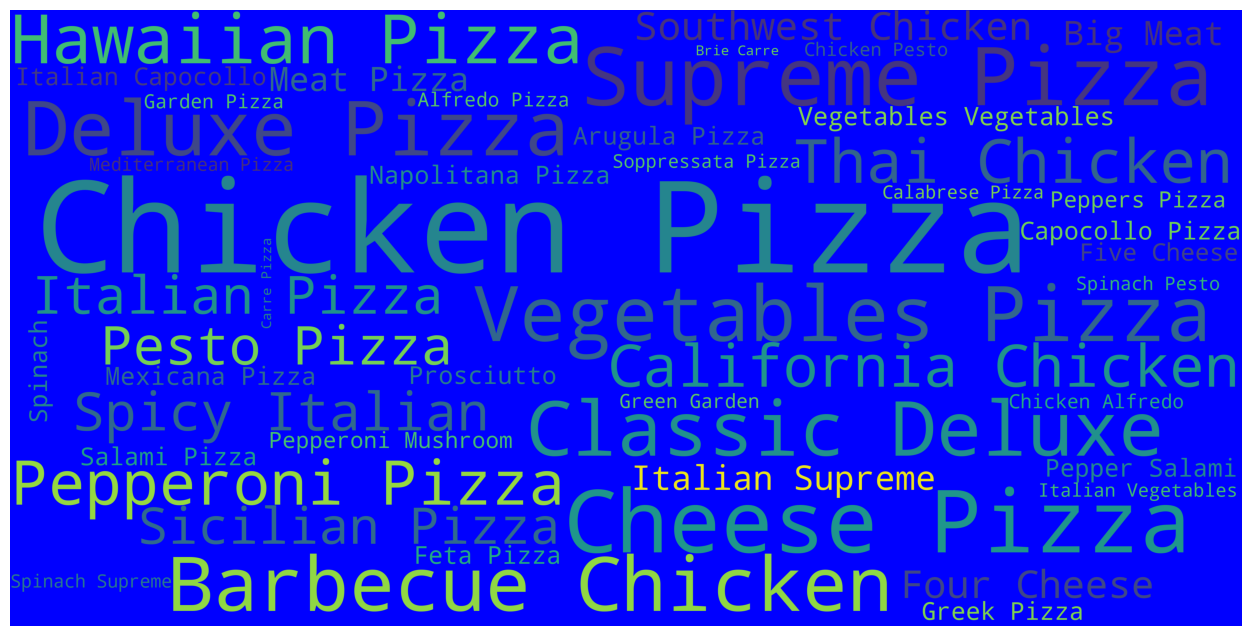

In [141]:
# df['pizza_name'] = df['pizza_name'].astype('str')
# title_corpus = ' '.join(df['pizza_name'])

# title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='Blue', height=2000, width=4000).generate(title_corpus)
# plt.figure(figsize=(16,8))
# plt.imshow(title_wordcloud)
# plt.axis('off')
# plt.show()

In [146]:

# pizza_mask = np.array(Image.open("'C:\Users\flowe\Downloads\pie-chart-portion.png'")))
# pizza_mask

SyntaxError: unmatched ')' (441487501.py, line 1)